In [1]:
import tensorflow as tf
import numpy as np


In [2]:
print(tf.__version__)

2.4.1


In [3]:
mnsit = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnsit.load_data()

11493376/11490434 [==============================] - 0s 0us/step


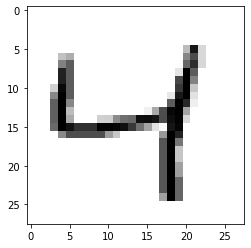

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
model.fit(x_train,y_train,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4578 - accuracy: 0.8595
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1114 - accuracy: 0.9655
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9754
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0560 - accuracy: 0.9828
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0418 - accuracy: 0.9872
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9893
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0264 - accuracy: 0.9914
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [11]:
val_loss, val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1269 - accuracy: 0.9753


In [12]:
model.save('mnsit_nn')

INFO:tensorflow:Assets written to: mnsit_nn/assets


In [13]:
new_model= tf.keras.models.load_model('mnsit_nn')

In [14]:
predictions = new_model.predict([x_test])
print(predictions)

[[6.1425781e-19 9.0518988e-11 9.6483984e-12 ... 1.0000000e+00
  2.5693469e-14 6.0049583e-11]
 [1.1214300e-11 2.3018385e-06 9.9999774e-01 ... 2.1778690e-11
  2.0775742e-11 1.0416628e-16]
 [5.6788424e-10 9.9999905e-01 1.6663252e-08 ... 2.1497213e-07
  6.0922218e-07 1.5337585e-09]
 ...
 [2.0182861e-12 1.2568454e-11 1.9370512e-11 ... 9.3523826e-12
  1.6334194e-09 5.1447868e-09]
 [7.5353093e-15 2.1035532e-18 4.9176869e-15 ... 4.6414795e-17
  3.0431083e-10 2.4631170e-16]
 [5.8977416e-13 1.7487246e-24 4.7568290e-16 ... 2.7794978e-30
  1.9863945e-15 6.0836248e-27]]


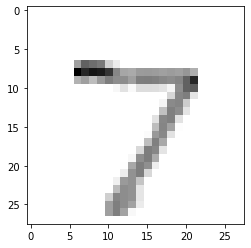

In [15]:
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [16]:
print(np.argmax(predictions[0]))

7


YEAH!